In [1]:
import agent as myagents
import gym
import matplotlib.pyplot as plt
from tqdm import tqdm
import utils
import numpy as np
from IPython.display import clear_output
import time

### Environment

In [2]:
env = gym.make("FrozenLake8x8-v0")

### Agent

In [3]:
agent_init = {
    'discount_factor': .999, 
    'learning_rate': 0.05, 
    'exploration_rate_decay': {
        'er': 0.1,
        'max_er': 1,
        'min_er': 0.01,
        'decay_er': 5e-03,
        'constant_er': True
    },
    'trace_decay': 0.9,
    'num_action': env.action_space.n,
    'num_state': env.observation_space.n,
}
sarsa_lambda_agent = myagents.SarsaLambdaAgent(agent_init)

### Training

In [6]:
timesteps_per_episode = list()
rewards_per_episode = list()
n_episode = 10000
t_max_per_episode = 200
verbose = False
graphical = False
rewards_per_episode_array = np.array([])

In [7]:
for i_episode in tqdm(range(n_episode)):
    
    rewards = 0
    state = env.reset()
    next_action = sarsa_lambda_agent.episode_init(state)
    
    for t in range(t_max_per_episode):
        
        if graphical:
            clear_output(wait=True)
            env.render()
            
        
        state, reward, done, info = env.step(next_action)
        next_action = sarsa_lambda_agent.update(state, reward, done)
        
        rewards += reward
        if done:
            break
            
    timesteps_per_episode.append(t)
    rewards_per_episode.append(rewards)
    sarsa_lambda_agent.epsilon.next()

sarsa_lambda_agent.epsilon.reset_episode_count()
env.close()

100%|██████████| 10000/10000 [04:22<00:00, 38.09it/s]


In [8]:
rewards_per_episode_array = np.concatenate([rewards_per_episode_array, np.array(rewards_per_episode)])

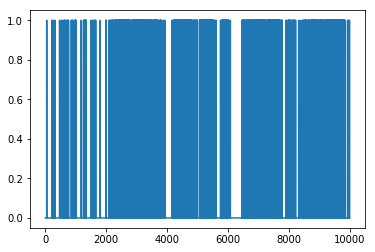

In [9]:
plt.plot(range(len(rewards_per_episode_array)), rewards_per_episode_array)

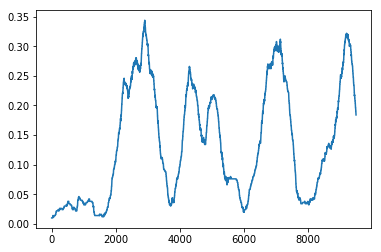

In [10]:
rewards_per_episode_rolling_mean = utils.moving_average(rewards_per_episode_array, n=500)
plt.plot(range(len(rewards_per_episode_rolling_mean)), rewards_per_episode_rolling_mean)

In [36]:
rewards_per_episode[49900:]

array([1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Testing

In [73]:
sarsa_agent.epsilon = 0.0

In [16]:
for i_episode in range(1):
    
    rewards = 0
    state = env.reset()
    next_action = sarsa_agent.episode_init(state)
    
    for t in range(t_max_per_episode):
        
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)  
        state, _, done, _ = env.step(next_action)
        next_action = sarsa_agent.e_greedy(state)
        
        if done:
            break
    
env.close()

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [5]:
0.01 + .99/ np.exp(-0.01*5678)

4.5172682076241185e+24

In [26]:
import inspect
lines = inspect.getsource(sarsa_agent.update)
print(lines)

    def update(self, state, reward, done):
        next_action = -1
        if not done:
            next_action = self.update_step(state, reward)
        if done:
            self.update_end(reward)

        return next_action



In [69]:
agent_init

{'discount_factor': 0.999,
 'learning_rate': 0.05,
 'exploration_rate_decay': {'er': 1,
  'max_er': 1,
  'min_er': 0.01,
  'decay_er': 0.005},
 'num_action': 4,
 'num_state': 64}